# Language Identification Challenge 
Kaggle Hackathon (Advanced Classification Practical Exam) 

---
### Honour Code

I {**Damola Abiola**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Hackathon Overview: South African Language Identification Hackathon 2023

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable
tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society. 

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
With such a multilingual populations, it is only obvious that the systems and devices also communicate in multi-languages.



<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F7f34544c1b1f61d1a5949bddacfd84a9%2FSouth_Africa_languages_2011.jpg?generation=1604393669339034&alt=media" width=80%/>
                                                            **Image courtesy of South African Government**

### Problem Statement

The south African Government hired me to deploy a dependent model that is capable of determining a text which is in any of South Africa's 11 Official languages and identify which
language the text is written.

### Data overview
The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt.

The data is in the form Language ID, Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data.
File descriptions

- train_set.csv - the training set
- test_set.csv - the test set
- sample_submission.csv - a sample submission file in the correct format

Language IDs

- afr - Afrikaans
- eng - English
- nbl - isiNdebele
- nso - Sepedi
- sot - Sesotho
- ssw - siSwati
- tsn - Setswana
- tso - Xitsonga
- ven - Tshivenda
- xho - isiXhosa
- zul - isiZulu

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Engineering</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Model Training / Testing</a>

<a href=#six>6. Model Development / Performance</a>

<a href=#seven>7. Model Explanations / Conclusions</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
|  |

---

In [35]:
# Data analysis and wrangling libraries
import pandas as pd
import numpy as np

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
import string
import re
import nltk
from nltk.corpus import stopwords
import time
import collections
from collections import Counter

# Modelling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn import metrics
from sklearn.metrics import f1_score
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
import advertools as adv

# Metrics for Model Evaluation
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import  log_loss
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import time

# Warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Libraries to Save/Restore Models
import pickle

# Downloads
nltk.download(['punkt','stopwords'])
%matplotlib inline
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DOWEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DOWEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |

---

In [5]:
# Load train data
df_train = pd.read_csv(r'C:\Users\DOWEN\Downloads\Hackathon-Language-Identification-main\input\train_set.csv')

# Load test data
df_test = pd.read_csv(r'C:\Users\DOWEN\Downloads\Hackathon-Language-Identification-main\input\test_set.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
|This phase is important. This will help to understand patterns in the data, pinpoint any outliers and indicate relationships between variables using  descriptive statistics and data visualisations

---

In [6]:
# to view the first 5 rows of the train data
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [7]:
# to view the first 5 rows of the test data
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [8]:
# view the info for both data set.
print(f'information of TRAIN dataset: {df_train.info()}')
print(f'informationof TEST dataaet: {df_test.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB
information of TRAIN dataset: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB
informationof TEST dataaet: None


- The Train dataset has two categorical features while test dataset has only one
- We observed no missing values for both datasets

In [9]:
df_train.shape

(33000, 2)

In [10]:
df_test.shape

(5682, 2)

In [11]:
### Further exploratory of data

In [12]:
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [13]:
df_test.isnull().sum()

index    0
text     0
dtype: int64

We observed from above that there `No Missing Values in the Datasets`

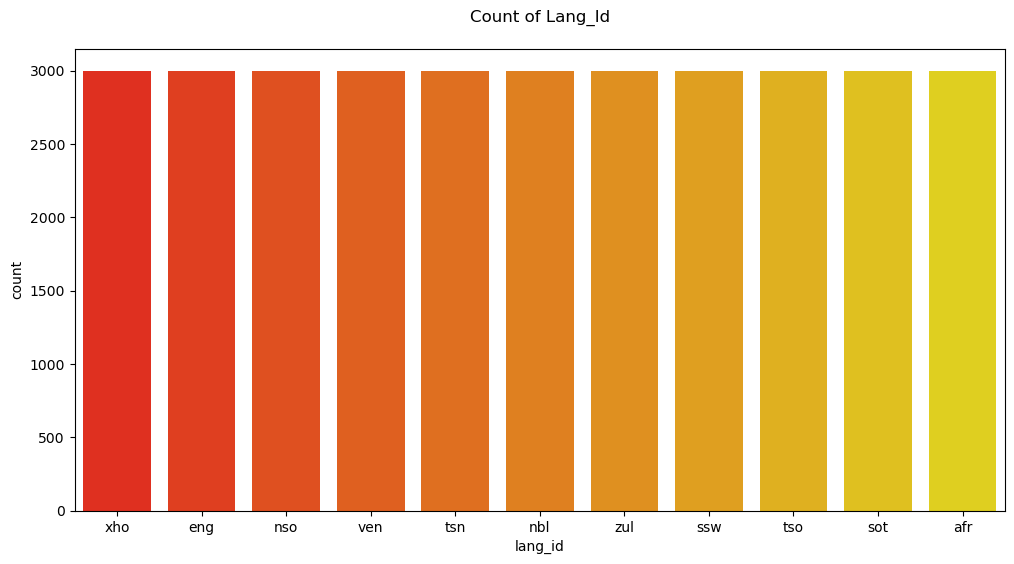

In [14]:
# Plot of Distributin of each language 
plt.figure(figsize=(12,6))
sns.countplot(x='lang_id',data=df_train, palette="autumn")
plt.title('Count of Lang_Id\n')
plt.show()

In [15]:
# The count of observations against lan_id
df_train.lang_id.value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

We observed that all language id have same value which shows that data are balanced for each language class 

Unique Language IDs given to us

- afr - Afrikaans
- eng - English
- nbl - isiNdebele
- nso - Sepedi
- sot - Sesotho
- ssw - siSwati
- tsn - Setswana
- tso - Xitsonga
- ven - Tshivenda
- xho - isiXhosa
- zul - isiZulu

<a id="four"></a>
## 4. Data cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data Cleaning ⚡ |
| :--------------------------- |
|  clean the dataset, and possibly create new features -using Natural language process . |

In [16]:
df1 = df_train.copy()
df1.columns

Index(['lang_id', 'text'], dtype='object')

# 4.1 Cleaning the datasets 
We need to remove the noises in the data sets, such as punctuations and numbers to make the data cleaner. Also, We need to clean the train data first and change the text to lower case

### Cleaning the Train datasets

In [17]:
import string

In [18]:
## data cleaning for train data
#removing tags 
to_remove = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});''<.*?>')
#function to remove the tags
def cleantags(lang):
  cleanlang = re.sub(to_remove, '', lang)
  return cleanlang
df1['text'] = df1['text'].apply(cleantags)

#Remove punctuation
def remove_punctuation(lang):
  stringpunct = string.punctuation 
  return ''.join([l for l in lang if l not in stringpunct])
df1['text'] = df1['text'].apply(remove_punctuation)

#removing newline space
def cleantext(text):
  text =re.sub("\n"," ",text)
  text = re.sub(r'\d+','',text)
  text = re.sub(r'[@][©®™]','',text)
  return text
df1['text'] = df1['text'].apply(cleantext)

# Make lower case
df1['text'] = df1['text'].str.lower()

df1.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [19]:
#placing some short words
#df1['text'] =df1['text'].str.replace(".txt","")

In [20]:
# removing short words from train data
#df1['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))


### Cleaning the test datasets

In [21]:
#test data before being cleaned
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [22]:
#made a copy so not to interfere with the original data
df1_test = df_test.copy()

In [23]:
# data cleaning for train data
#removing tags
to_remove = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});''<.*?>')
#function to remove the tags
def cleantags(lang):
  cleanlang = re.sub(to_remove, '', lang)
  return cleanlang
df1_test['text'] = df1_test['text'].apply(cleantags)

#Remove punctuation
import string
def remove_punctuation(lang):
  stringpunct = string.punctuation
  return ''.join([l for l in lang if l not in stringpunct])
df1_test['text'] =df1_test['text'].apply(remove_punctuation)

#removing newline space
def cleantext(text):
  text =re.sub("\n"," ",text)
  text = re.sub(r'\d+','',text)
  text = re.sub(r'[@][©®™]','',text)
  return text
df1_test['text'] = df1_test['text'].apply(cleantext)

# Make lower case
print ('Lower case...')
df1_test['text'] = df1_test['text'].str.lower()

df1_test.head(5)

Lower case...


,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


In [24]:
#placing some short words
#df1_test['text'] =df1_test['text'].str.replace(".txt",'')

In [25]:
# removing short words from train data
#df1_test['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))


## Insights from cleaning done above
- Some languages had english text on them and even short english words eg `txt`  it would have  made sense to remove some english words from those other non english languages but it proof to be a difficult task  deep learning would help in this situation
-  in some languages punctuation matter the words can lose meaning and sotho and pedi can have similar words making predictions more complicated

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, create one or more regression models that are able to accurately predict the Sentiment. |

---

In [26]:
# selecting the features and the target
x = df1['text']
y = df1['lang_id']

# two vectoriser to use  which one to chose
#cv = CountVectorizer(min_df = 1,max_df = 0.9, ngram_range =(1,3),stop_words ='english')
tfidf = TfidfVectorizer(min_df = 1,max_df = 0.9, ngram_range =(1,2),stop_words ='english')
X = tfidf .fit_transform(x)
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.10, 
                                                    random_state=42)

# Building Classifiers

In [27]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.linear_model import RidgeClassifier

ModuleNotFoundError: No module named 'catboost'

In [28]:
names = ['Logistic Regression'
         
         #'Nearest Neighbors'#,
        'MultinomialNB',
        #'SGDClassifier',
        'ComplementNB', 
        'Random Forest', 
        'Ridge',
        'BernoulliNB'
]

In [33]:
classifiers = [
    LogisticRegression(C=10,
            max_iter= 1000,
            multi_class='ovr',
            random_state= 220,
            solver= 'saga'),
    #KNeighborsClassifier(1),
    MultinomialNB(alpha = 0.1),
    #SGDClassifier(loss='hinge',
                    #penalty='l2',
                    #alpha=1e-3,
                    #random_state=42,
                    #max_iter=1000),
    ComplementNB(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    RidgeClassifier(alpha = 0.1),
    BernoulliNB()
]

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [34]:
# Extracting the sites
#def CiteParser(content):
    #soup = BeautifulSoup(content)
    #print soup
    #print "---> site #: ",len(soup('cite'))
    #result = []
    #for cite in soup.find_all('cite'):
        #if cite.string is not None:
            #result.append(cite.string.split('/'))
            #print cite
    #return result

In [36]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred,)
    precision = metrics.precision_score(y_train, y_pred,average='weighted')
    recall    = metrics.recall_score(y_train, y_pred,average="weighted")

    f1        = metrics.f1_score(y_train, y_pred,average="weighted")
    f1_test   = metrics.f1_score(y_test, y_pred_test,average="weighted")

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... ALL models done running ')

Fitting Logistic RegressionMultinomialNB model...


KeyboardInterrupt: 

##  Model perfomance 

In [38]:
sorted_results = sorted(results, key=lambda x: x['F1 Train'], reverse=True)

# Now 'sorted_results' contains the dictionaries sorted by 'F1 Train' in descending order
for result in sorted_results:
    print(result)

`logistic regresion` and `Nearest neighbors` are  extremely overfitting  worse than `Ridge`,`MultinomialNB`,`ComplementNB`,`BernoulliNB`

### hypertuning Models

In [39]:
param_grid = {'alpha': [0.1, 1, 5,0.3,0.5, 10]}
grid = GridSearchCV(ComplementNB(), param_grid=param_grid,cv= 5,scoring = 'f1_weighted')
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
print("Best parameters:")
lr_params = grid.best_params_
print(grid.best_params_)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best parameters:
{'alpha': 0.3}
accuracy 0.996969696969697
              precision    recall  f1-score   support

         afr       0.99      1.00      1.00       281
         eng       1.00      1.00      1.00       297
         nbl       0.99      0.99      0.99       327
         nso       1.00      0.99      1.00       322
         sot       0.99      1.00      1.00       307
         ssw       1.00      1.00      1.00       286
         tsn       1.00      1.00      1.00       297
         tso       1.00      1.00      1.00       253
         ven       1.00      1.00      1.00       322
         xho       0.99      1.00      1.00       313
         zul       1.00      0.98      0.99       295

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



Count vectorizer works better but takes too long to fit such large data set  i used tfidf to vectorize to see which model perform best 

`Ridge`,`MultinomialNB`,`ComplementNB`,`BernoulliNB` have the highest f1 score and accuracy which we need to hypertumes to maximise predictions since most of the models are overfiting the f1 score here is not same score Kaggle is giving me

# First Stacking  of high models

In [40]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import LabelEncoder

In [41]:
x = df1['text']
y = df1['lang_id']
estimators = [('Multinomialnb', MultinomialNB(alpha = 0.1)),('Multinomial', MultinomialNB(alpha = 0.1))]

clf = StackingClassifier(estimators=estimators, final_estimator = MultinomialNB(alpha = 0.1) )

from sklearn.model_selection import train_test_split
cv1 = CountVectorizer(ngram_range =(1,5),analyzer = "char",min_df =1,max_df=0.9)
X = cv1.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9992727272727273

### Second standing that gave me secong highest score 

In [42]:
x = df1['text']
y = df1['lang_id']
estimators = [('MultinomialNB', MultinomialNB(alpha = 0.1)),('Multinomial', MultinomialNB(alpha = 0.1))]

clf1 = StackingClassifier(estimators=estimators, final_estimator = RidgeClassifier(alpha = 0.1) )

from sklearn.model_selection import train_test_split
cv1 = CountVectorizer(ngram_range =(3,7),analyzer = "char")
X = cv1.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.9996363636363637

third stacking

In [43]:
x = df1['text']
y = df1['lang_id']
estimators = [('MultinomialNB', MultinomialNB(alpha = 0.1)),('Multinomial', MultinomialNB(alpha = 0.1))]

clf2 = StackingClassifier(estimators=estimators, final_estimator = RidgeClassifier(alpha = 0.01) )

from sklearn.model_selection import train_test_split
cv1 = CountVectorizer(ngram_range =(3,8),analyzer = "char")
X = cv1.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.9996363636363637

#  Choosing the best model for FINAL submission file 

FINAL STACKING 

In [44]:
x= df1["text"]
y = df1["lang_id"]
cv = CountVectorizer(ngram_range=(6,6), analyzer='char', min_df=2, max_df=0.9, stop_words='english')

X = cv.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y,

                                                    test_size=0.01,

                                                    random_state=10)
x_test = cv.transform(df_test["text"]) #going to use the test data to test the performance of the test and for submission

C:\Users\DOWEN\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


FITTING FIRST MODELS

In [45]:
estimators = [('Complement', ComplementNB(alpha = 0.01)),('Multinomial', MultinomialNB(alpha=0.01))]

clf = StackingClassifier(estimators=estimators, final_estimator = MultinomialNB(alpha = 0.01) , n_jobs=-1,passthrough=True)
clf.fit(X_train, y_train)
print (clf.score(X_test, y_test))
y_pred1 = clf.predict(x_test)

1.0


SECOND MODELS FOR FINAL STACKING

In [46]:
estimators = [('Complement', ComplementNB(alpha = 0.01)),('Multinomial', MultinomialNB(alpha=0.02))]

clf2 = StackingClassifier(estimators=estimators, final_estimator = clf, n_jobs=-1,passthrough=True)
clf2.fit(X_train, y_train)
print(clf2.score(X_test, y_test))
y_pred1 = clf2.predict(x_test)

1.0


# CONCLUSION 
MOst of the models are over fitting after stacking locally im getting 1 while on kaggle i get 0.9753 which is 0.0247 less meaning the models are overfitting by a great margin .Some of the languages we not predicted correctly 

<a id="six"></a>
## 7. Model Documentation and Submission file
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model documentation ⚡ |
| :--------------------------- |
| In this section it contains submission files and model saving |

---

general submission file for some models i tried 

In [47]:
submission_df = pd.DataFrame(df_test['index'])
test1 = df_test['text'] #using cleaned test text data 
# vectorise test data
test_vec = cv.transform(test1) # replace cv with tfidt if used a different vectorizer
# Predict the sentiment using the test data
y_pred = clf.predict(test_vec) #replace clf with any model you wanna 
# Assign a new column of predictions
submission_df['lang_id'] = y_pred
# save the csv file and submit it. 
submission_df.to_csv('submission.csv', index=False)



submission file for final  super stacking 

In [48]:
submission_df = pd.DataFrame(df_test['index'])

submission_df['lang_id'] = y_pred1 # predictions generated by stacking 

submission_df.to_csv('submissionfinal.csv', index=False)

<a id="ref"></a>
## Reference Links
<a href=#cont>Back to Table of Contents</a>

Resources that helped me with the challenges
- https://www.kaggle.com/datasets/basilb2s/language-detection
- edsa buiding classifiers notebook
- https://bush-dev.com/introduction-to-stacking-classifier/